# **Correlation analysis in R**

Correlation quantifies the degree to which two variables are connected or related. Essentially, it helps us understand which variables change together in a similar manner, which change in opposite directions, and which ones don't have a noticeable relationship.

In this module, I'll demonstrate how to calculate correlation coefficients, conduct tests to evaluate these correlations, and visually represent the interconnections between variables using the R programming language.

In [1]:
install.packages("mlbench")
install.packages("ggpubr")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘numDeriv’, ‘SparseM’, ‘MatrixModels’, ‘minqa’, ‘nloptr’, ‘RcppEigen’, ‘carData’, ‘abind’, ‘pbkrtest’, ‘quantreg’, ‘lme4’, ‘Rcpp’, ‘corrplot’, ‘car’, ‘ggrepel’, ‘ggsci’, ‘cowplot’, ‘ggsignif’, ‘gridExtra’, ‘polynom’, ‘rstatix’




In [10]:
install.packages("EnvStats")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘nortest’




In [2]:
library(mlbench)
library(tidyverse)
library(ggpubr)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.2     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.3     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [11]:
library(EnvStats)


Attaching package: ‘EnvStats’


The following objects are masked from ‘package:stats’:

    predict, predict.lm




## **Methods for correlation analyses**

*   Pearson correlation (parametric data)
*   Kendall tau (non-parametric data)
*   Spearman rho (non-parametric data)

**In the formula below**,

x and y are 2 vectors of continuous variables.
$\bar{x} = mean_x$ and
$\bar{y}= mean_y$

## **Pearson correlation**

$$
r = \frac{\sum{(x - \bar{x})(y - \bar{y})}}{\sqrt{\sum{(x - \bar{x})^2}\sum{(y - \bar{y})^2}}}
$$

The P value of the correlation can be determined by using the correlation coefficient table for [the degrees of freedom](https://faculty.washington.edu/heagerty/Books/Biostatistics/TABLES/t-Tables/) : **df=n−2**
, where n is the number of observation in x and y variables or by calculating the **t value **as follow:

$$
t = \frac{r\sqrt{n-2}}{\sqrt{1-r^2}}
$$

<font color='red'>If the p-value is < 5%, then the correlation between x and y is significant.</font>

## **Spearman correlation**

The Spearman correlation method computes the correlation between the rank of x and the rank of y variables.

$$
r = \frac{\sum(x' - m_{x'}) (y'_{i} - m_{y'})}{\sqrt{\sum (x' - m_{x'})^2 \sum (y' - m_{y'})^2}}
$$

Where x' is rank of x and y' is rank of y; the smallest one is rank 1.

## **Kendall correlation**

The Kendall correlation method measures the correspondence between the ranking of x and y variables. The total number of possible pairings of x with y observations is n(n−1)/2
, where n is the size of x and y.

The procedure is as follow:

Begin by ordering the pairs by the x values. If x and y are correlated, then they would have the same relative rank orders.

Now, for each $y_i$
, count the number of $y_j$ > $y_i$
 (concordant pairs (c)) and the number of $y_j$ < $y_i$
 (discordant pairs (d)).

**Kendall correlation distance is defined as follow:**

$$
\tau = \frac{n_c - n_d}{\frac{1}{2} n (n - 1)}
$$


Where,
*   $n_c$: total number of concordant pairs
*   $n_d$: total number of discordant pairs
*   n: size of x and y

# **Starting: consider pearson correlation**

## Preleminary test to check the test assumptions

• Is the covariation linear?

Visualization

• Are the data from each of the 2 variables (x, y) follow a normal distribution?

Use Shapiro-Wilk normality test –> R function: shapiro.test()

• No outlier?

Boxplot, Rosner Test

**1. Visualization by scatter plot**

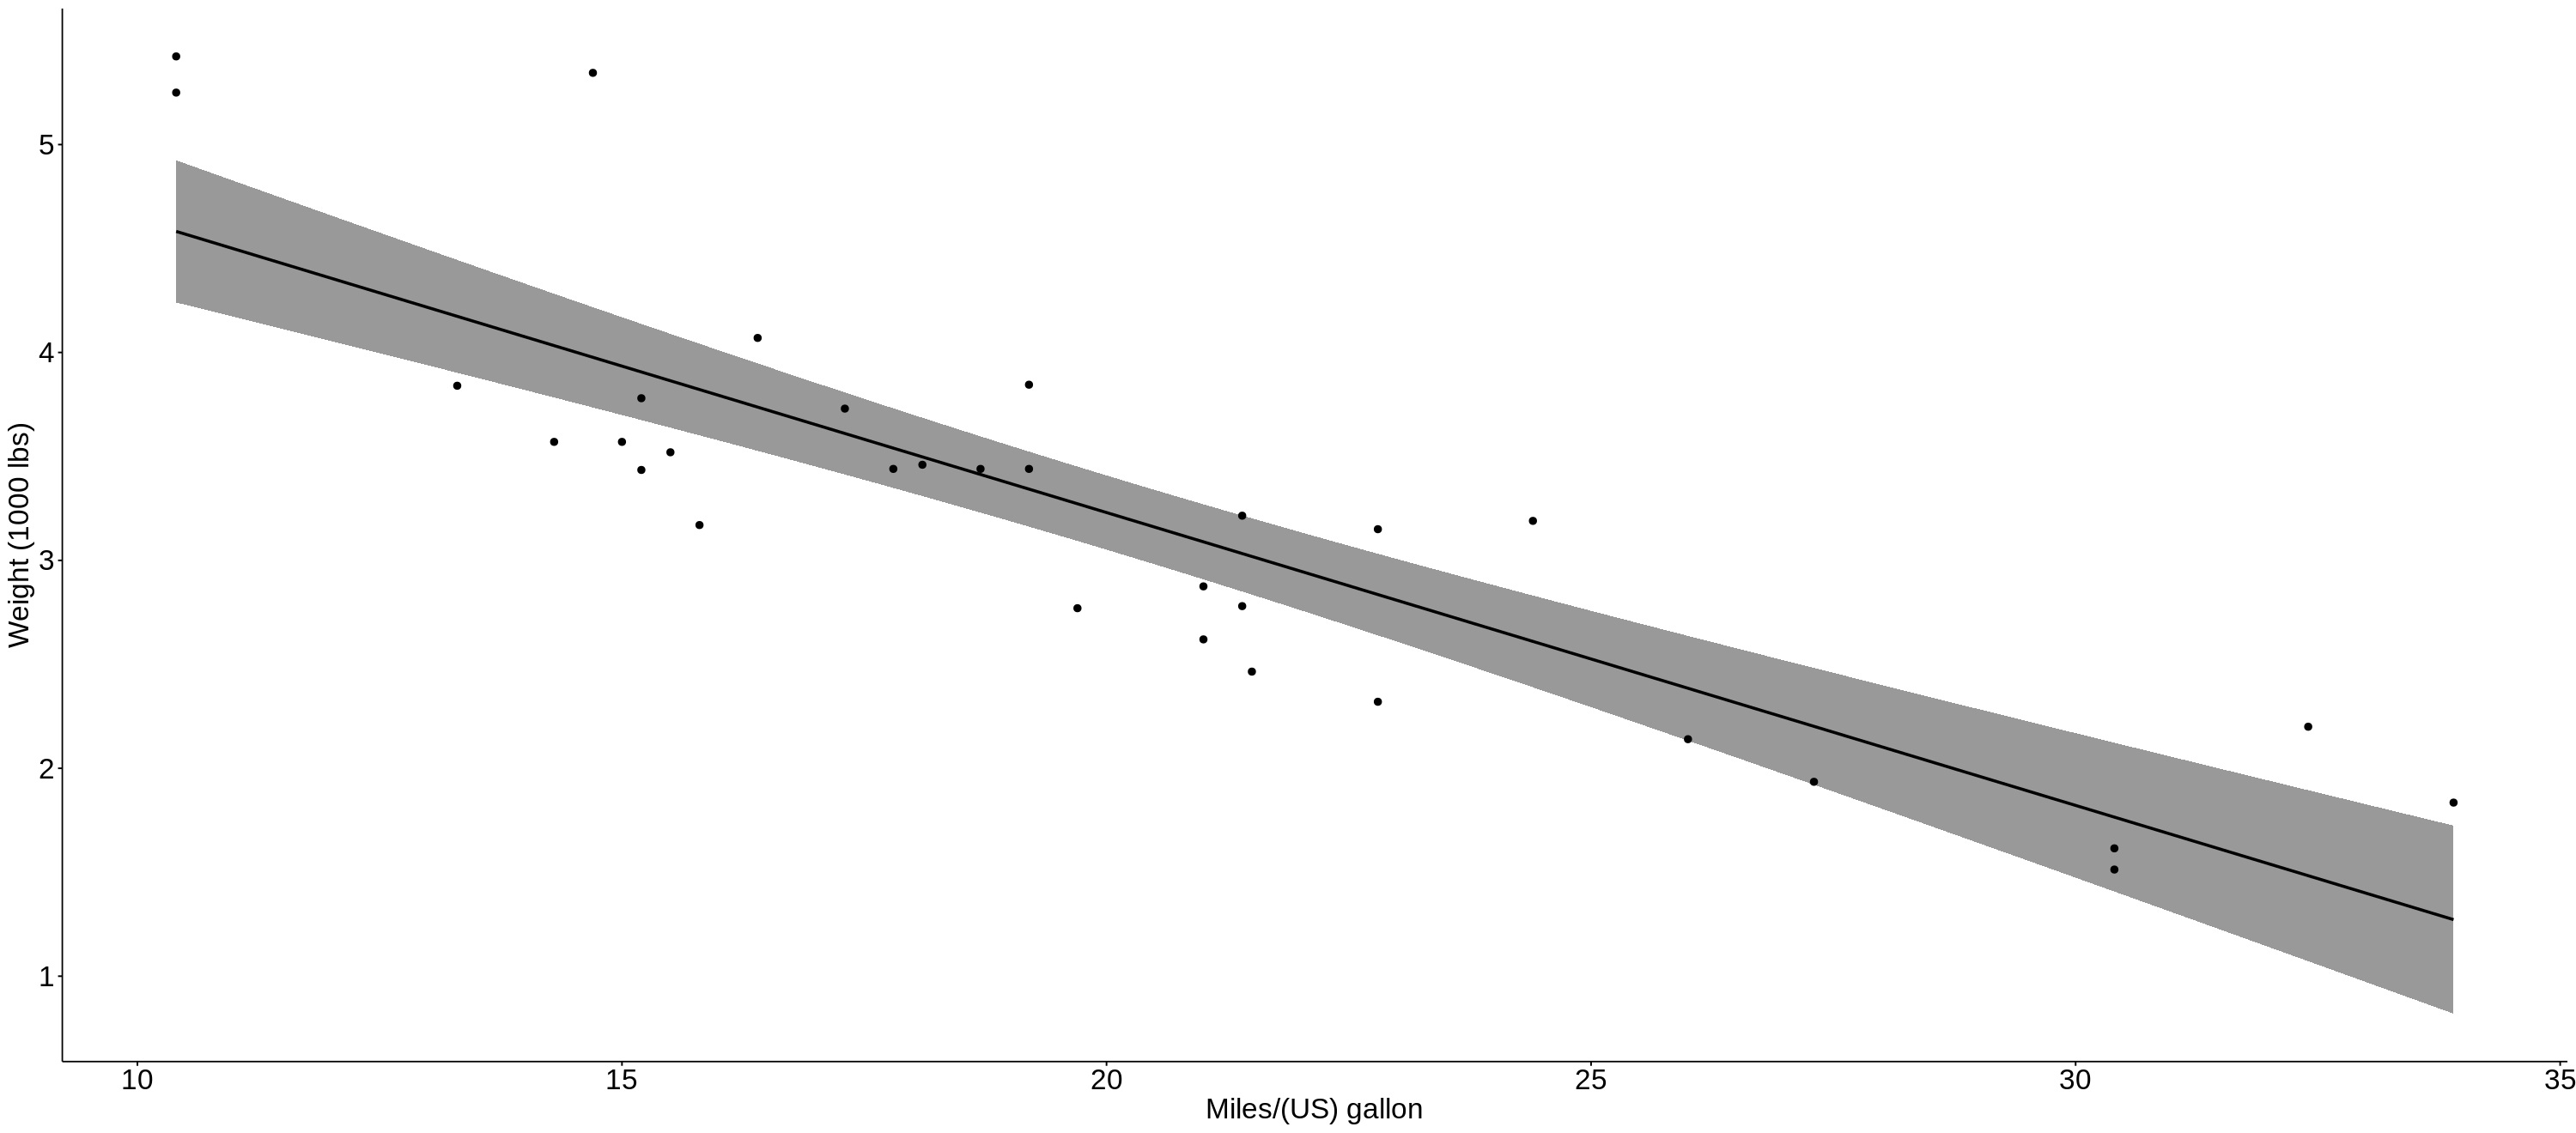

In [22]:
options(repr.plot.width=25, repr.plot.height=11)
ggscatter(mtcars, x = "mpg", y = "wt",
          add = "reg.line", conf.int = TRUE,
          xlab = "Miles/(US) gallon", ylab = "Weight (1000 lbs)")+
            theme(text = element_text(size = 20))

It is possible for linear fit.

**2.  The variables (x, y) follow a normal distribution?**

In [20]:
shapiro.test(mtcars$mpg)


	Shapiro-Wilk normality test

data:  mtcars$mpg
W = 0.94756, p-value = 0.1229


P value ⩾ 0.05 indicate normal distribution.

In [23]:
shapiro.test(mtcars$wt)


	Shapiro-Wilk normality test

data:  mtcars$wt
W = 0.94326, p-value = 0.09265


P value ⩾ 0.05 indicate normal distribution.

**3. No outlier?**

Boxplot

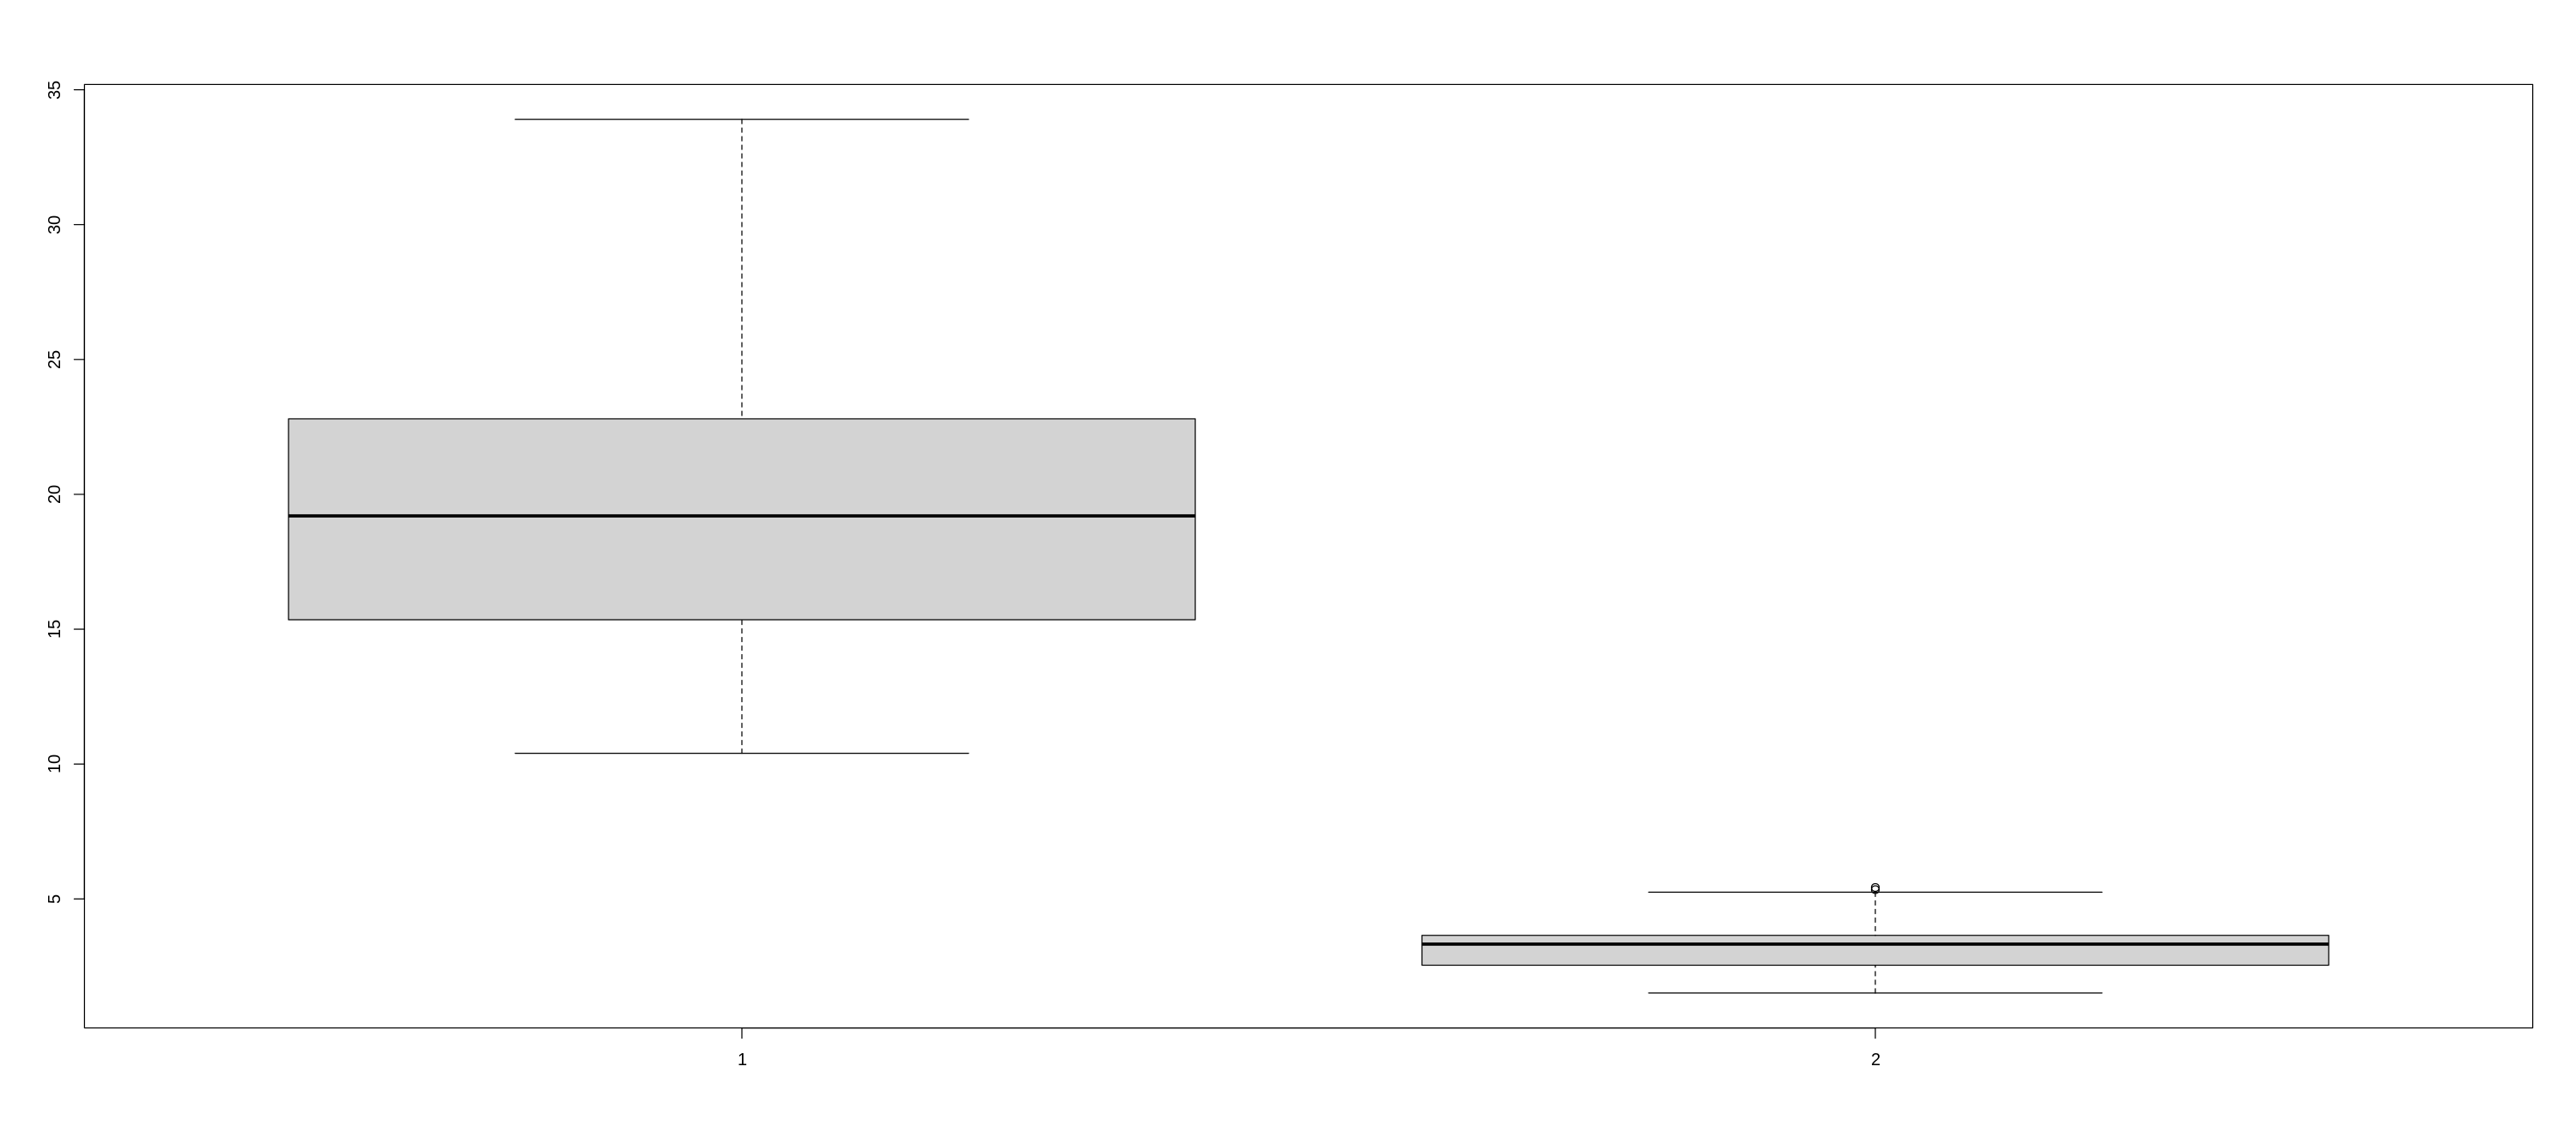

In [24]:
boxplot(mtcars$mpg,mtcars$wt)

Rosner test

In [25]:
rosnerTest(mtcars$mpg)


Results of Outlier Test
-------------------------

Test Method:                     Rosner's Test for Outliers

Hypothesized Distribution:       Normal

Data:                            mtcars$mpg

Sample Size:                     32

Test Statistics:                 R.1 = 2.291272
                                 R.2 = 2.291827
                                 R.3 = 2.182345

Test Statistic Parameter:        k = 3

Alternative Hypothesis:          Up to 3 observations are not
                                 from the same Distribution.

Type I Error:                    5%

Number of Outliers Detected:     0

  i   Mean.i     SD.i Value Obs.Num    R.i+1 lambda.i+1 Outlier
1 0 20.09062 6.026948  33.9      20 2.291272   2.938048   FALSE
2 1 19.64516 5.565359  32.4      18 2.291827   2.923571   FALSE
3 2 19.22000 5.122930  30.4      19 2.182345   2.908473   FALSE



In [26]:
rosnerTest(mtcars$wt)


Results of Outlier Test
-------------------------

Test Method:                     Rosner's Test for Outliers

Hypothesized Distribution:       Normal

Data:                            mtcars$wt

Sample Size:                     32

Test Statistics:                 R.1 = 2.255336
                                 R.2 = 2.425760
                                 R.3 = 2.644617

Test Statistic Parameter:        k = 3

Alternative Hypothesis:          Up to 3 observations are not
                                 from the same Distribution.

Type I Error:                    5%

Number of Outliers Detected:     0

  i   Mean.i      SD.i Value Obs.Num    R.i+1 lambda.i+1 Outlier
1 0 3.217250 0.9784574 5.424      16 2.255336   2.938048   FALSE
2 1 3.146065 0.9064935 5.345      17 2.425760   2.923571   FALSE
3 2 3.072767 0.8232698 5.250      15 2.644617   2.908473   FALSE



**Hence, there is no outlier**

What if there is an outlier? For example,

In [27]:
rosnerTest(c(mtcars$mpg,200))


Results of Outlier Test
-------------------------

Test Method:                     Rosner's Test for Outliers

Hypothesized Distribution:       Normal

Data:                            c(mtcars$mpg, 200)

Sample Size:                     33

Test Statistics:                 R.1 = 5.473170
                                 R.2 = 2.291272
                                 R.3 = 2.291827

Test Statistic Parameter:        k = 3

Alternative Hypothesis:          Up to 3 observations are not
                                 from the same Distribution.

Type I Error:                    5%

Number of Outliers Detected:     1

  i   Mean.i      SD.i Value Obs.Num    R.i+1 lambda.i+1 Outlier
1 0 25.54242 31.875049 200.0      33 5.473170   2.951949    TRUE
2 1 20.09062  6.026948  33.9      20 2.291272   2.938048   FALSE
3 2 19.64516  5.565359  32.4      18 2.291827   2.923571   FALSE



# **Pearson correlation test**

In [30]:
cor.test(mtcars$mpg, mtcars$wt, method=c("pearson"))


	Pearson's product-moment correlation

data:  mtcars$mpg and mtcars$wt
t = -9.559, df = 30, p-value = 1.294e-10
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.9338264 -0.7440872
sample estimates:
       cor 
-0.8676594 


# **Spearman and Kandall Rank correlation**

Create a non parametric data

In [31]:
nonpar<- rbind(mtcars[,c("mpg","wt")],data.frame(mpg=200,wt=3))

In [32]:
shapiro.test(nonpar$mpg)


	Shapiro-Wilk normality test

data:  nonpar$mpg
W = 0.32079, p-value = 3.108e-11


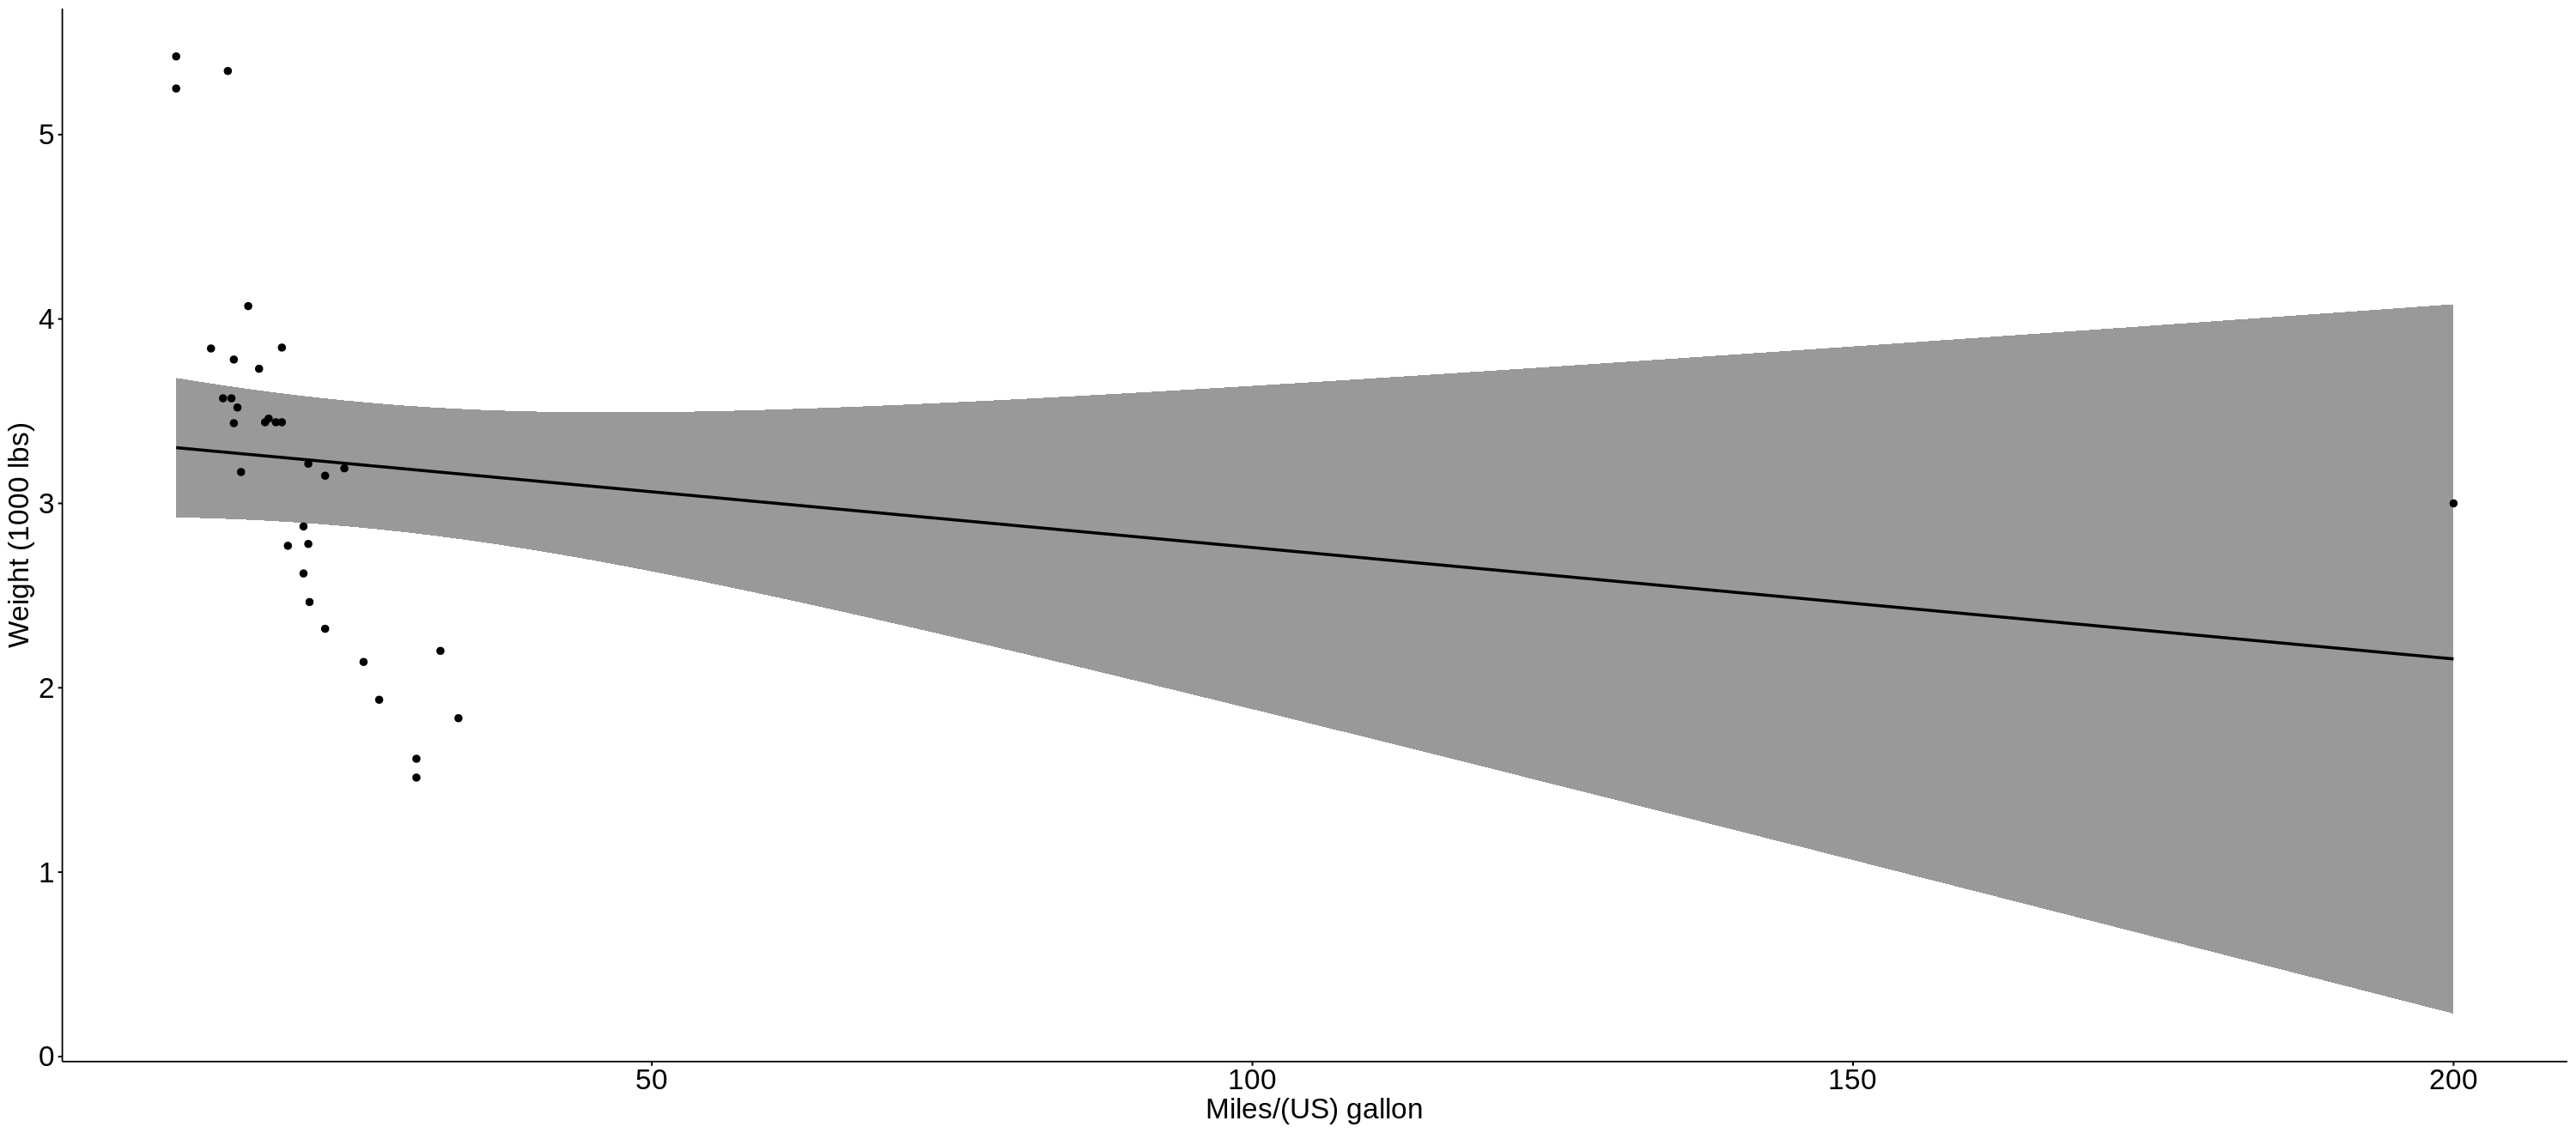

In [33]:
ggscatter(nonpar, x = "mpg", y = "wt",
          add = "reg.line", conf.int = TRUE,
          xlab = "Miles/(US) gallon", ylab = "Weight (1000 lbs)")+
            theme(text = element_text(size = 20))

In [34]:
cor.test(nonpar$mpg, nonpar$wt, method=c("spearman"))

Warning message in cor.test.default(nonpar$mpg, nonpar$wt, method = c("spearman")):
“Cannot compute exact p-value with ties”



	Spearman's rank correlation rho

data:  nonpar$mpg and nonpar$wt
S = 11162, p-value = 8.151e-11
alternative hypothesis: true rho is not equal to 0
sample estimates:
       rho 
-0.8653396 


In [35]:
cor.test(nonpar$mpg, nonpar$wt, method=c("kendall"))

Warning message in cor.test.default(nonpar$mpg, nonpar$wt, method = c("kendall")):
“Cannot compute exact p-value with ties”



	Kendall's rank correlation tau

data:  nonpar$mpg and nonpar$wt
z = -5.6634, p-value = 1.484e-08
alternative hypothesis: true tau is not equal to 0
sample estimates:
       tau 
-0.6985675 
